In [2]:
import sklearn

# sklearn.__version__

sklearn(scikit-learn) 이란?
- 머신러닝 라이브러리
- 기계학습 모델
- 주요기능
     1. 분류(classification) : 주어진 데이터가 어느 클래스에 속하는지 판별하는 것  
         * SGD(stochastic gradient descent) : 선형의 클래스 분류 방법(대규모)  
         * 커넬근사 : 비선형적인 클래스 분류 방법(대규모)  
         * Linear SVC : 선형의 클래스 분류 방법(중소규모)  
         * k근접법 : Lineaer SVC로 잘분류되지 않는 경우 사용, 비선형적인 클래스 분류 방법(중소규모)  
     2. 회귀(Regression) : 전달된 데이터를 바탕으로 값을 예상  
         * SGD(stochastic gradient descent) : 선형 회귀 분석 방법(대규모)  
         * LASSO, ElasticNet : 설명 변수의 일부가 중요한 경우에 추천하는 회귀 분석 방법(중소규모)  
         * Ridge, Liner SVR : 설명 변수의 전부가 중요한 경우에 추천하는 회귀 분석 방법(중소규모)  
         * SVR(가우스 커넬), Ensemble : Ridge또는 Liner SVR로 잘 분석되지 않는 경우 이용, 비선형적 회귀              분석 방법
     3. 클러스터링(Clustering) : 전달된 데이터를 어떤 규칙에 따라 나누는 것
         * KMeans : 몇 개의 클러스터를 분할할지, 사전에 정해둔 경우 추천하는 클러스터링분석방법. 대규모              데이터의 경우, MiniBatch라고 해서 데이터를 나누면서 학습시키는 방법을 취함
         * 스펙트럼 클러스터링(GMM) : KMeans로 잘 분석되지 않는 경우에 이용, 비선형적인 클러스터링 분석              방법
         * MeanShift, VBGMM : 몇 개의 클러스터로 나눌지에 대해, 사전에 정할 수 없는 경우에 추천하는 클러            스터링 분석 방법
     4. 그 외 기타 기능
         * 차원감소 : 전달된 데이터의 차원 수가 많은 경우, 학습효율이 떨어지므로 차원을 감소시키는 전처리            를 실시, PCA, 커넬PCA, Isomap, SpectralEmbedding 등의 방법이 있다.
         * 하이퍼 파라미터의 최적화 : 기계학습을 실행할 때, 학습 방법 등을 조정하는 수치(하이퍼 파라미터)
           . 그리드 서치, 크로스밸리테이션 등의 방법이 있다.
         
        

[2 0 0 1 1 1 2 1 1 2 1 2 1 0 0 1 0 2 2 0 0 1 1 2 2 2 0 1 2 0 1 1 2 0 0 0 1
 2]


0.7631578947368421

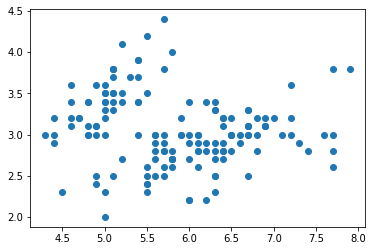

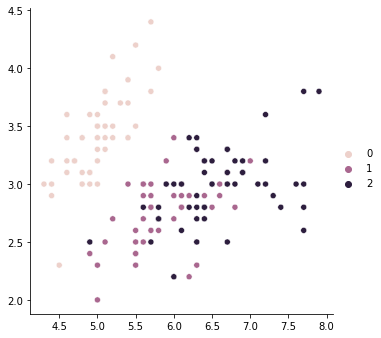

In [10]:
from sklearn.datasets import load_iris                  # 사이킷런 패키지에 포함된 데이터 가져옴
from sklearn.neighbors import KNeighborsClassifier      
# neighbors : 분류기 // KNeighborsClassifier : k개의 이웃 중 거리가 가장 가까운 이웃 영향
from sklearn.model_selection import train_test_split    
# 테스트 세트 분리(학습데이터와 테스트데이터)
# 오버피팅을 막기 위해서 사용
# Train : 모델을 학습 시키기위한 dataset
# Test : 학습과 검증이 완료된 모델의 성능을 평가하기위한 dataset, 학습에 관여하지 않는다.
# Validation : 이미 학습된 모델을 검증하기위한 dataset으로 Train의 일부
import matplotlib.pyplot as plt
import seaborn as sns

# iris = load_iris()
# print('iris : ', iris)
X, y = load_iris(return_X_y=True)
# dataset을 X(Feature)과 y(label)에 반환
# X : 독립변수(?: 어떤 실험에서 실험자가 직접 변경하는 변수)
# y : 종속변수(?: 독립변수의 값이 변함에 따라 달라지는 수량)
X = X[:, :2]
# print('X : ', X)
# print('y : ', y)

_, axe = plt.subplots()
axe.scatter(X[:,0], X[:,1])
sns.relplot(x = X[:,0], y=X[:,1], hue=y)

# data_train, data_test, target_train, target_test = train_test_split(iris['data'], iris['target'],stratify=iris['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# print(len(data_train))
# print(len(data_test))

m = KNeighborsClassifier()
m.fit(X_train, y_train)

pred = m.predict(X_test)
print(pred)
# print(target_test)
m.score(X_test, y_test)

train  97
test  53


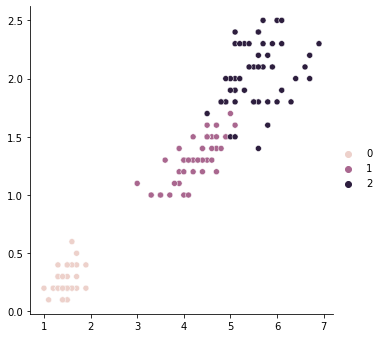

In [53]:
X, y = load_iris(return_X_y=True)  # small y 다른 데이터?(정확하게 찾아보자)
X = X[:, 2:4]  # Big X: 전체값에서 2개의 컬럼

sns.relplot(x = X[:,0], y=X[:,1], hue=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.35)
# 기본 값 test 0.25 / train에 나머지 0.75 만큼 가져가고, 그외 0.25만큼 테스트로 들고감 들고가는 값은 랜덤이다.

print('train ', len(X_train))
print('test ', len(X_test))

In [78]:
m = KNeighborsClassifier(n_neighbors=5, weights='distance')
m.fit(X_train, y_train)

print(X_test[0])
pred_1 = m.predict([[5.1, 1.6]])
print('예측값 ', pred_1, '예측확률[클래스 0, 클래스 1, 클래스 2]: ', m.predict_proba([[5.1, 1.6]]))
print('정답 ', y_test[0])

pred_all = m.predict(X_test)
print('예측값 ', pred_all)
print('정답 ', y_test)
print('정답비율', m.score(X_test, y_test))

[5.4 3.4]
예측값  [1] 예측확률[클래스 0, 클래스 1, 클래스 2]:  [[0. 1. 0.]]
정답  0
예측값  [0 2 2 1 0 1 2 0 2 0 2 1 2 0 2 0 2 1 0 0 1 2 1 1 1 1 1 1 0 1 1 2 0 0 2 1 0
 1]
정답  [0 2 2 1 0 1 2 0 1 0 1 2 2 0 1 0 2 1 0 0 1 2 2 1 2 2 2 1 0 2 1 1 0 0 2 1 0
 1]
정답비율 0.7368421052631579


In [68]:
data = load_iris()
print(data)
print('=======================================================================================================================================')
print(data['DESCR'])

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [32]:
data = load_iris(as_frame=True, return_X_y=True)
print(data)


# print(X)     # 대문자 : 2차원 배열
# print(y)     # 소문자 : 1차원 배열  일 가능성이 높음(암묵적인 약속)

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 0      0
1      0
2      0
3      0
4 